# Chapter 6 - Exercise 4
### Author: *John Benedick Estrada*
---
**Exercise:** In my implementation, the Life class is based on a parent class called `Cell2D`, and the `LifeViewer` class is based on `Cell2DViewer`. You can use these base classes to implement other 2-D cellular automatons.

For example, one variation of GoL, called “Highlife”, has the same rules as GoL, plus one additional rule: a dead cell with 6 neighbors comes to life.

Write a class named Highlife that inherits from Cell2D and implements this version of the rules. Also write a class named HighlifeViewer that inherits from Cell2DViewer and try different ways to visualize the results. As a simple example, use a different colormap.

One of the more interesting patterns in Highlife is the replicator (see http://thinkcomplex.com/repl). Use add_cells to initialize Highlife with a replicator and see what it does.

In [1]:
from Cell2D import Cell2D
from scipy.signal import correlate2d
import numpy as np

In [2]:
class HighLife(Cell2D):
    """Implementation of High Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 6, 12, 13]] = 1
    
    # Rules:
    #   1.) A dead cell comes to life if it has 3 or 6 live neighbors.
    #   2.) A live cell dies if its number of neighbors is not 2 or 3.
    
    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

##### Parser for GoL portable format from Exercise 6-2
Source: `./src/solutions/exercise6_2.ipynb`

_NOTE: Automata in Highlife and GoL are the same. As such this GoL portable format parser is used here as well._

In [3]:
def parse_GoL(raw_str):
    IN_ALIVE_CELL = "O"
    IN_DEAD_CELL = "."
    OUT_ALIVE_CELL = "1"
    OUT_DEAD_CELL = "0"
    COMMENT = "!"

    board = []
    str_by_lines = raw_str.split("\n")
    
    for line in str_by_lines:
        board.append("")
        for char in line:
            # Ignore white spaces.
            if char.isspace():
                continue
            # Ignore the remaining characters in the line as they are commented out.
            elif char == COMMENT:
                if len(board[-1]) == 0:
                    board.pop()
                break
            elif char == IN_ALIVE_CELL:
                board[-1] += OUT_ALIVE_CELL
            elif char == IN_DEAD_CELL:
                board[-1] += OUT_DEAD_CELL
            else:
                raise ValueError("'{}' is an invalid character.".format(char))
    return board


def make_high_life(n, m, row, col, str_input):
    life = HighLife(n, m)
    life.add_cells(row, col, *parse_GoL(str_input))
    return life

### Demo: Replicator

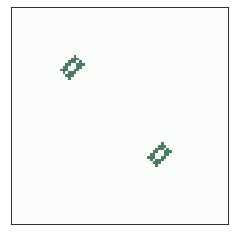

In [4]:
replicator = """
! Name: Replicator
! Source: https://conwaylife.com/w/index.php?title=Replicator
...OOO.
..O..O.
.O...O.
.O..O
.OOO...
"""

replicator_HL = make_high_life(80, 80, 35, 35, replicator)
replicator_HL.animate(100)